# Bike Sharing

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider __BoomBikes__ has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

_You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market._

In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt, numpy as np, pandas as pd, seaborn as sns
from sklearn.metrics import r2_score

## 1. Data Understanding, Preparation and EDA

### Data Dictionary

Adding the data dictionary here for easier reference

```
=========================================
Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
```

Looking at the data dictionary, a few things right off the bat 
1. The categorical variables in the dataset are 
    - `season` 
    - `holiday` (binary categorical)
    - `weekday`
    - `workingday` (binary categorical)
    - `weathersit`
2. `cnt` is the target variable (from the problem statement)
3. possible colinear variables
    - `cnt` is just a sum of `registered` and `casual` and hence it's likely colinear
       

### Load dataset

In [2]:
bikeshare_data = pd.read_csv('./day.csv')

In [3]:
bikeshare_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1a. Data Quality Checks

#### Checking for null values

In [4]:
bikeshare_data.shape

(730, 16)

In [5]:
bikeshare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


From the info output, it can be seen that all the columns have 730 values and hence there are no null values in the dataset.

#### Data bounds check

In [6]:
bikeshare_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Observing the range of each column (i,e min and max value) there doesn't seem to be any values that deviate from the data dictionary description.

### 1b. EDA

In [7]:
# Select only numerical columns
eda_df = pd.concat([bikeshare_data.select_dtypes(['float']), bikeshare_data['cnt']], axis='columns')

eda_df.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


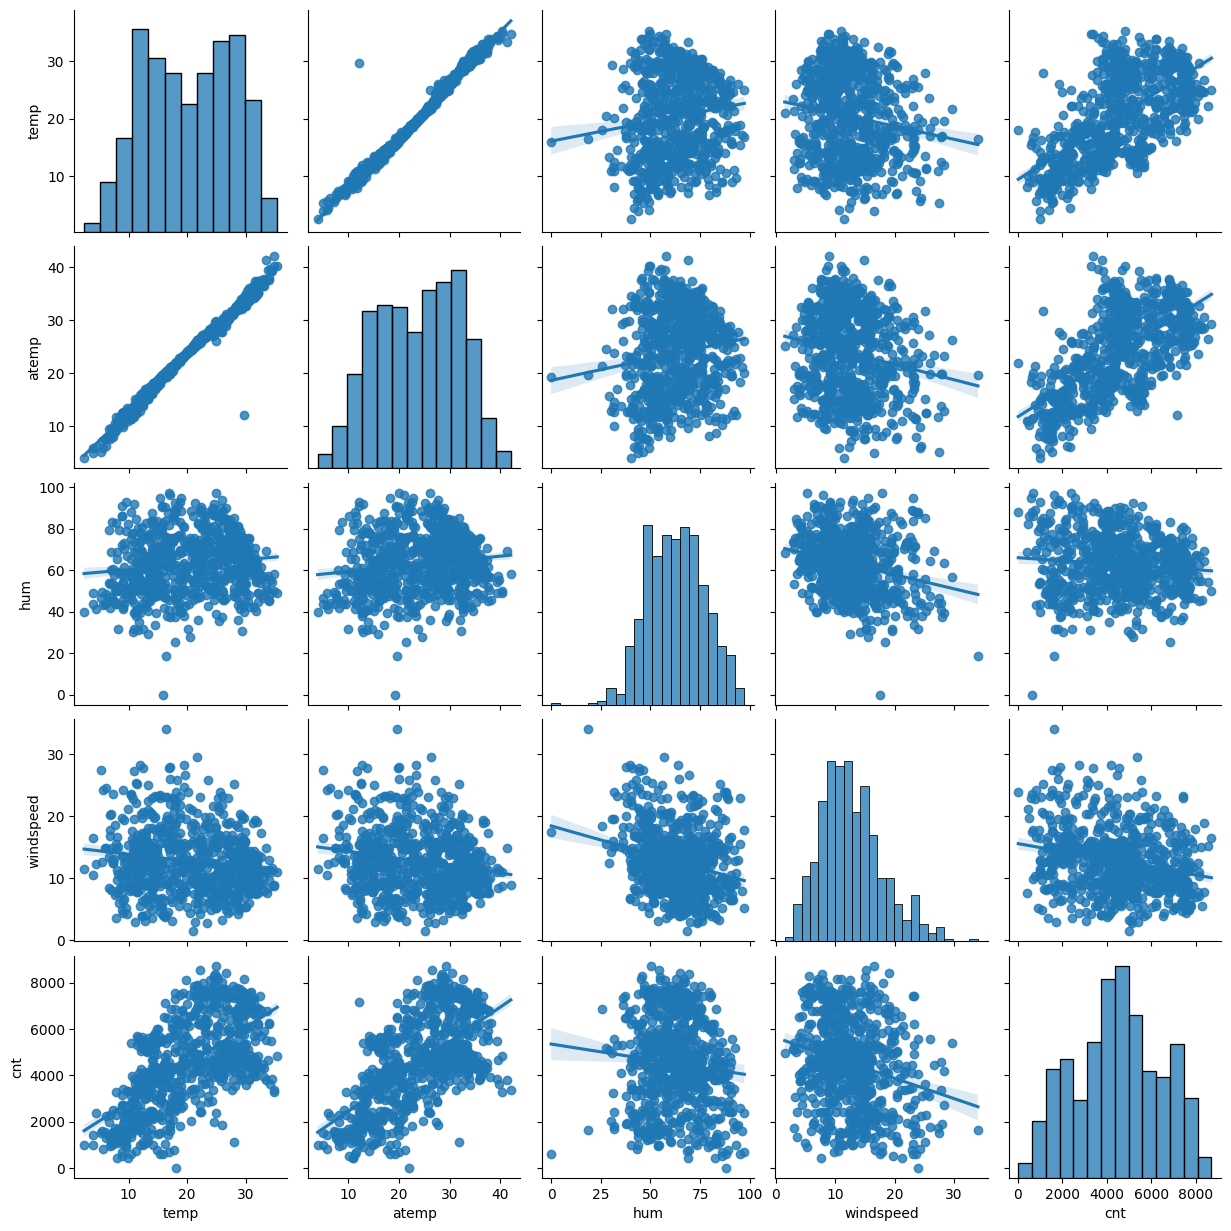

In [8]:
sns.pairplot(data=eda_df, kind='reg')
plt.show()

### 1c. Handling Categorical variables

The following are the categorical variables in the dataset
1. holiday (binary categorical)
2. workingday (binary categorical)
3. season
4. weekday
5. weathersit

#### Binary Categorical variables

In [9]:
bikeshare_data[['holiday', 'workingday']].describe()

,holiday,workingday
count,730.000000,730.000000
mean,0.028767,0.683562
std,0.167266,0.465405
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


Since the values are already numerical, there is nothing else to be done for these binary categorical values

#### Non binary categorical variables

In [10]:
bikeshare_data[['season', 'weekday', 'weathersit']].describe()

,season,weekday,weathersit
count,730.000000,730.000000,730.000000
mean,2.498630,2.997260,1.394521
std,1.110184,2.006161,0.544807
min,1.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000
50%,3.000000,3.000000,1.000000
75%,3.000000,5.000000,2.000000
max,4.000000,6.000000,3.000000


As per the data dictionary, the values for season map to the following categories

- 1:spring, 
- 2:summer, 
- 3:fall, 
- 4:winter

In [11]:
# Modify the dataframe to convert numerical values in the seasons column to their respective string labels
season_mapping = ['spring', 'summer', 'fall', 'winter']
bikeshare_data.season = bikeshare_data.season.apply(lambda x: season_mapping[x-1])

In [12]:
# Modify the dataframe to convert the weekday numerical values to the name of the weekday
# In the data dictionary it's not specified as which day of the week is represented by which number, but it can be 
# inferred using the date from the dteday column 
weekdays = ['tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'monday']
bikeshare_data.weekday = bikeshare_data.weekday.apply(lambda x: weekdays[x])

In [13]:
weather_categories = ['partly_cloudy', 'mist', 'light_snow', 'heavy_rain']
bikeshare_data.weathersit = bikeshare_data.weathersit.apply(lambda x: weather_categories[x])

In [14]:
bikeshare_data.weathersit.value_counts()

weathersit
mist          463
light_snow    246
heavy_rain     21
Name: count, dtype: int64

In [15]:
# Verify that labels are properly set for the appropriate columns
bikeshare_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,monday,0,light_snow,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,tuesday,0,light_snow,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,wednesday,1,mist,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,thursday,1,mist,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,friday,1,mist,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Encoding non binary categorical values

In [16]:
dummies_season = pd.get_dummies(bikeshare_data.season, dtype='int', drop_first=True, prefix='season')
dummies_season

,season_spring,season_summer,season_winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [17]:
dummies_weekday = pd.get_dummies(bikeshare_data.weekday, dtype='int', drop_first=True, prefix='weekday')
dummies_weekday

,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
725,0,1,0,0,0,0
726,0,0,1,0,0,0
727,1,0,0,0,0,0
728,0,0,0,0,1,0


In [18]:
dummies_weathersit = pd.get_dummies(bikeshare_data.weathersit, dtype='int', drop_first=True, prefix='weathersit')
dummies_weathersit

,weathersit_light_snow,weathersit_mist
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
725,1,0
726,1,0
727,1,0
728,0,1


In [19]:
# Add all the dummy columns created in the previous steps to the main dataset
bikeshare_data = pd.concat([bikeshare_data, dummies_season, dummies_weathersit, dummies_weekday], axis='columns')

In [20]:
# Drop the columns for which dummy values are added
bikeshare_data = bikeshare_data.drop(columns=['weathersit', 'season', 'weekday'], axis='columns')

In [21]:
bikeshare_data.sample(5) 

,instant,dteday,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,...,season_summer,season_winter,weathersit_light_snow,weathersit_mist,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday
152,153,02-06-2018,0,6,0,1,29.315000,32.19710,30.5000,19.583229,...,1,0,0,1,0,1,0,0,0,0
695,696,27-11-2019,1,11,0,1,11.958347,14.07790,78.6667,15.916654,...,0,1,1,0,0,0,0,1,0,0
583,584,07-08-2019,1,8,0,1,30.169153,34.88105,70.3750,7.832836,...,0,0,1,0,0,0,0,1,0,0
36,37,06-02-2018,0,2,0,0,11.719153,14.58355,56.8333,9.500600,...,0,0,0,1,0,0,0,0,1,0
531,532,16-06-2019,1,6,0,0,25.898347,29.73540,50.4167,11.166689,...,1,0,0,1,1,0,0,0,0,0


In [22]:
date_time_index = pd.DatetimeIndex(bikeshare_data.dteday, dayfirst=True)

In [23]:
bikeshare_data['day_of_month'] = date_time_index.day

In [24]:
bikeshare_data.head()

,instant,dteday,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,...,season_winter,weathersit_light_snow,weathersit_mist,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,day_of_month
0,1,01-01-2018,0,1,0,0,14.110847,18.18125,80.5833,10.749882,...,0,1,0,1,0,0,0,0,0,1
1,2,02-01-2018,0,1,0,0,14.902598,17.68695,69.6087,16.652113,...,0,1,0,0,0,0,0,1,0,2
2,3,03-01-2018,0,1,0,1,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,1,3
3,4,04-01-2018,0,1,0,1,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,1,0,0,4
4,5,05-01-2018,0,1,0,1,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,5


In [25]:
# Drop the dteday column since a combination of yr, mnth and day_of_month together can represent the same 
bikeshare_data = bikeshare_data.drop('dteday', axis='columns')

In [26]:
# All the columns are now numeric
bikeshare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                730 non-null    int64  
 1   yr                     730 non-null    int64  
 2   mnth                   730 non-null    int64  
 3   holiday                730 non-null    int64  
 4   workingday             730 non-null    int64  
 5   temp                   730 non-null    float64
 6   atemp                  730 non-null    float64
 7   hum                    730 non-null    float64
 8   windspeed              730 non-null    float64
 9   casual                 730 non-null    int64  
 10  registered             730 non-null    int64  
 11  cnt                    730 non-null    int64  
 12  season_spring          730 non-null    int64  
 13  season_summer          730 non-null    int64  
 14  season_winter          730 non-null    int64  
 15  weathe

#### Remove irrelevant columns

In [27]:
# Utility method for plotting heatmap
def plot_heatmap(dataframe):
    plt.figure(figsize=(15, 12))
    sns.heatmap(dataframe.corr().round(2), annot=True, cmap='RdYlGn')
    plt.show()

In [28]:
# drop the 'instant' column as it's just an artificial identifier and hence irrelevant to our analysis
bikeshare_data = bikeshare_data.drop('instant', axis='columns')

Let's look at the heatmap to better understand which independed variables are highly correlated

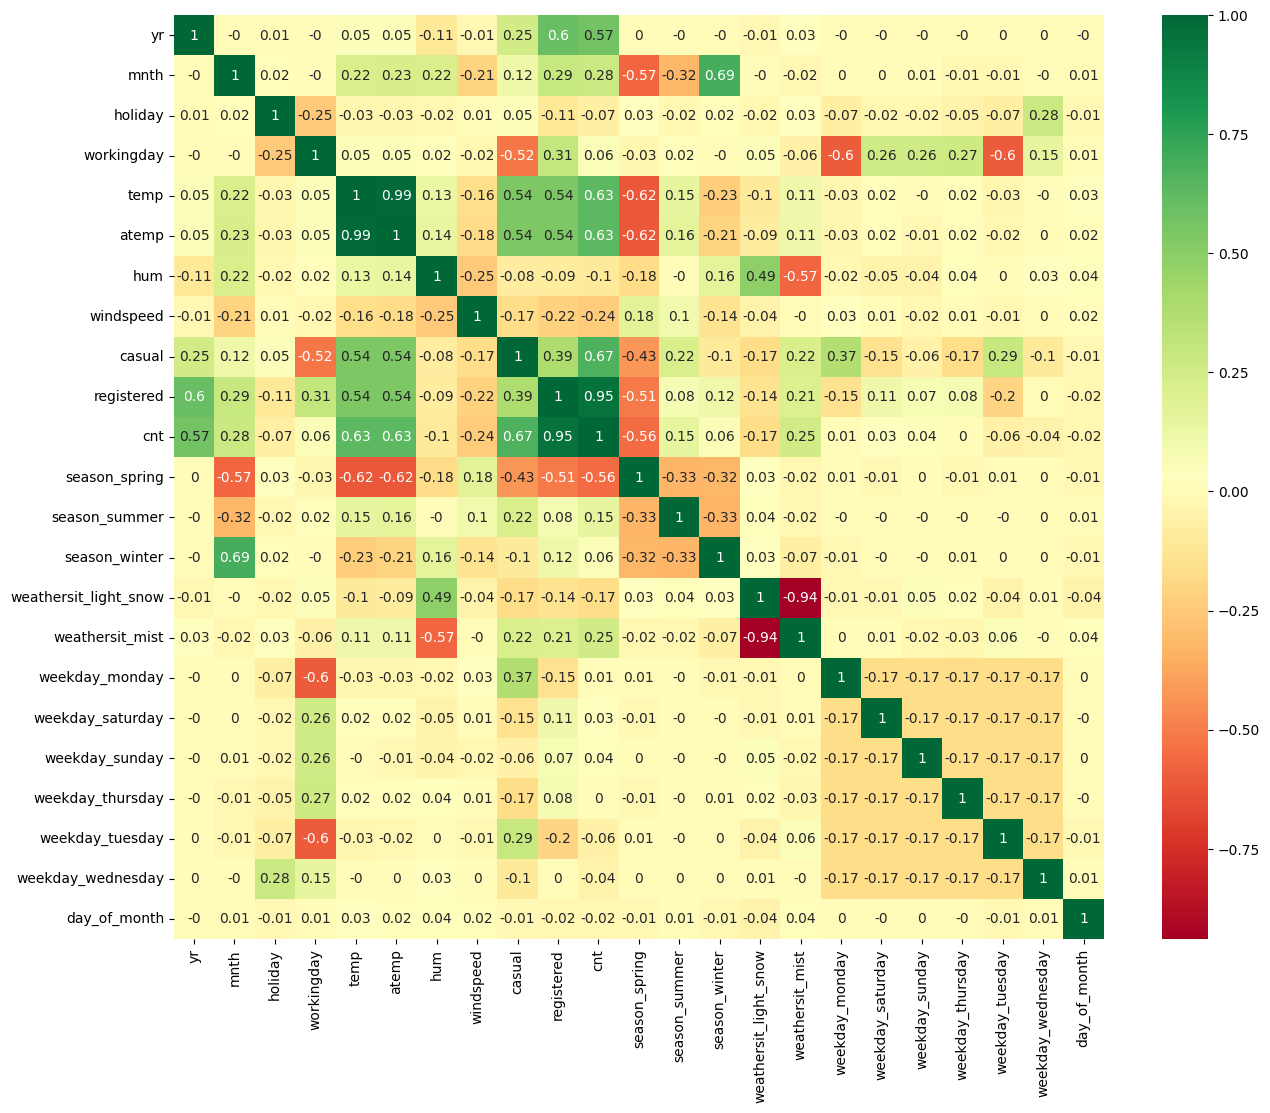

In [29]:
plot_heatmap(bikeshare_data)

> As can be seen in the heatmap above, `registered` and `casual` are strongly correlated with `cnt` but we know that `cnt = registered + casual`. <font color="brown">__We can safely drop the `registered` and `casual` columns.__</font>

In [30]:
# Ad-hoc Check to verify that cnt = registered + casual is true for all entries
np.where(bikeshare_data.cnt != bikeshare_data.registered + bikeshare_data.casual)

(array([], dtype=int64),)

From the check above it's clear that it's true for all entries that cnt = registered + casual 

In [31]:
# Drop registered and casual columns from the master dataframe
bikeshare_data = bikeshare_data.drop(['registered', 'casual'], axis='columns')

> `temp` and `atemp` are very strongly correlated (0.99), which makes sense <font color="brown">__since the "feels like" temperature is actually calculated using wind speed, humidity and the actual temperature, hence `atemp` can also be dropped.__</font>

In [32]:
bikeshare_data = bikeshare_data.drop(['atemp'], axis='columns')

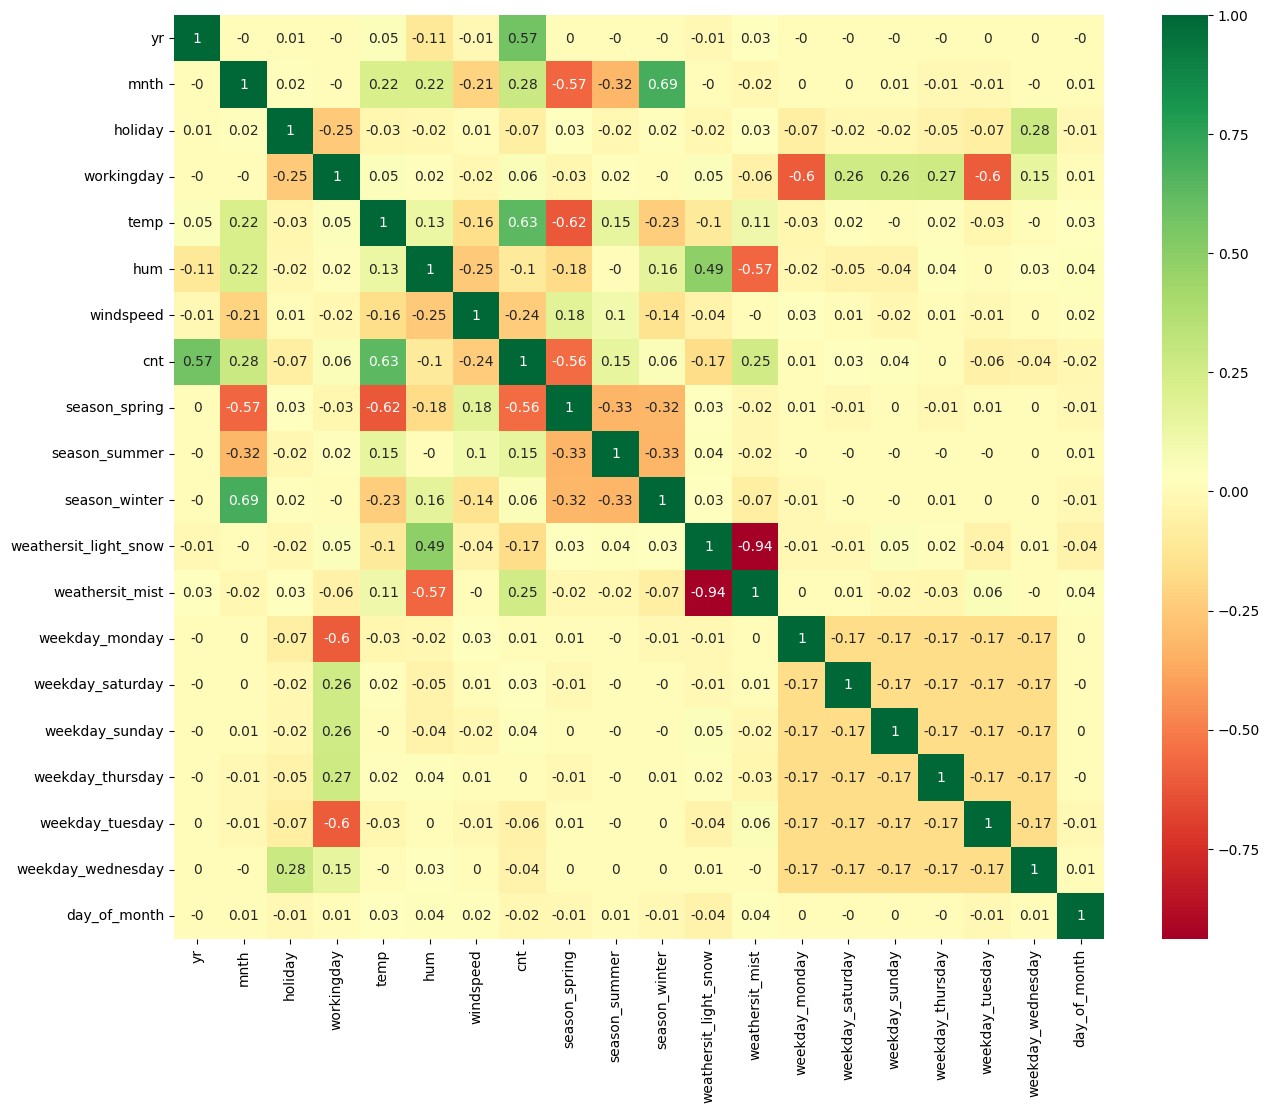

In [33]:
# Let's look at the heatmap now that some of the obvious columns have been dropped
plot_heatmap(bikeshare_data)

In [34]:
bikeshare_data

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light_snow,weathersit_mist,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,day_of_month
0,0,1,0,0,14.110847,80.5833,10.749882,985,1,0,0,1,0,1,0,0,0,0,0,1
1,0,1,0,0,14.902598,69.6087,16.652113,801,1,0,0,1,0,0,0,0,0,1,0,2
2,0,1,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,1,0,0,0,0,0,1,3
3,0,1,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,1,0,0,0,1,0,0,4
4,0,1,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,1,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,1,10.420847,65.2917,23.458911,2114,1,0,0,1,0,0,1,0,0,0,0,27
726,1,12,0,1,10.386653,59.0000,10.416557,3095,1,0,0,1,0,0,0,1,0,0,0,28
727,1,12,0,0,10.386653,75.2917,8.333661,1341,1,0,0,1,0,1,0,0,0,0,0,29
728,1,12,0,0,10.489153,48.3333,23.500518,1796,1,0,0,0,1,0,0,0,0,1,0,30


### Creating the train / test split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
df_train, df_test = train_test_split(bikeshare_data, train_size=0.7, random_state=100)

In [37]:
print('Shape of Train data =', df_train.shape)
print('Shape of Test data =', df_test.shape)

Shape of Train data = (510, 20)
Shape of Test data = (220, 20)


### Rescaling features

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
# yr is not included here because it's already in the range 0,1 
columns_to_be_scaled = ['mnth', 'temp', 'hum', 'windspeed', 'cnt', 'day_of_month']

In [41]:
df_train[columns_to_be_scaled] = scaler.fit_transform(df_train[columns_to_be_scaled])

# Performing only a transform on the test dataset since we don't want any data leakage 
df_test[columns_to_be_scaled] = scaler.transform(df_test[columns_to_be_scaled])

In [42]:
df_train.describe()

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light_snow,weathersit_mist,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,day_of_month
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.503743,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.345098,0.625490,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.486405
std,0.500429,0.315038,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.475867,0.484471,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.297061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233333
50%,1.000000,0.545455,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,1.000000,0.818182,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df_test.describe()

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light_snow,weathersit_mist,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,day_of_month
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.499174,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.318182,0.654545,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.500606
std,0.500809,0.311120,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.466833,0.476601,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.285182
min,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.258333
50%,0.000000,0.454545,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.483333
75%,1.000000,0.727273,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.766667
max,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


---

## 2. Model Building and Evaluation

### 2a. Training the model

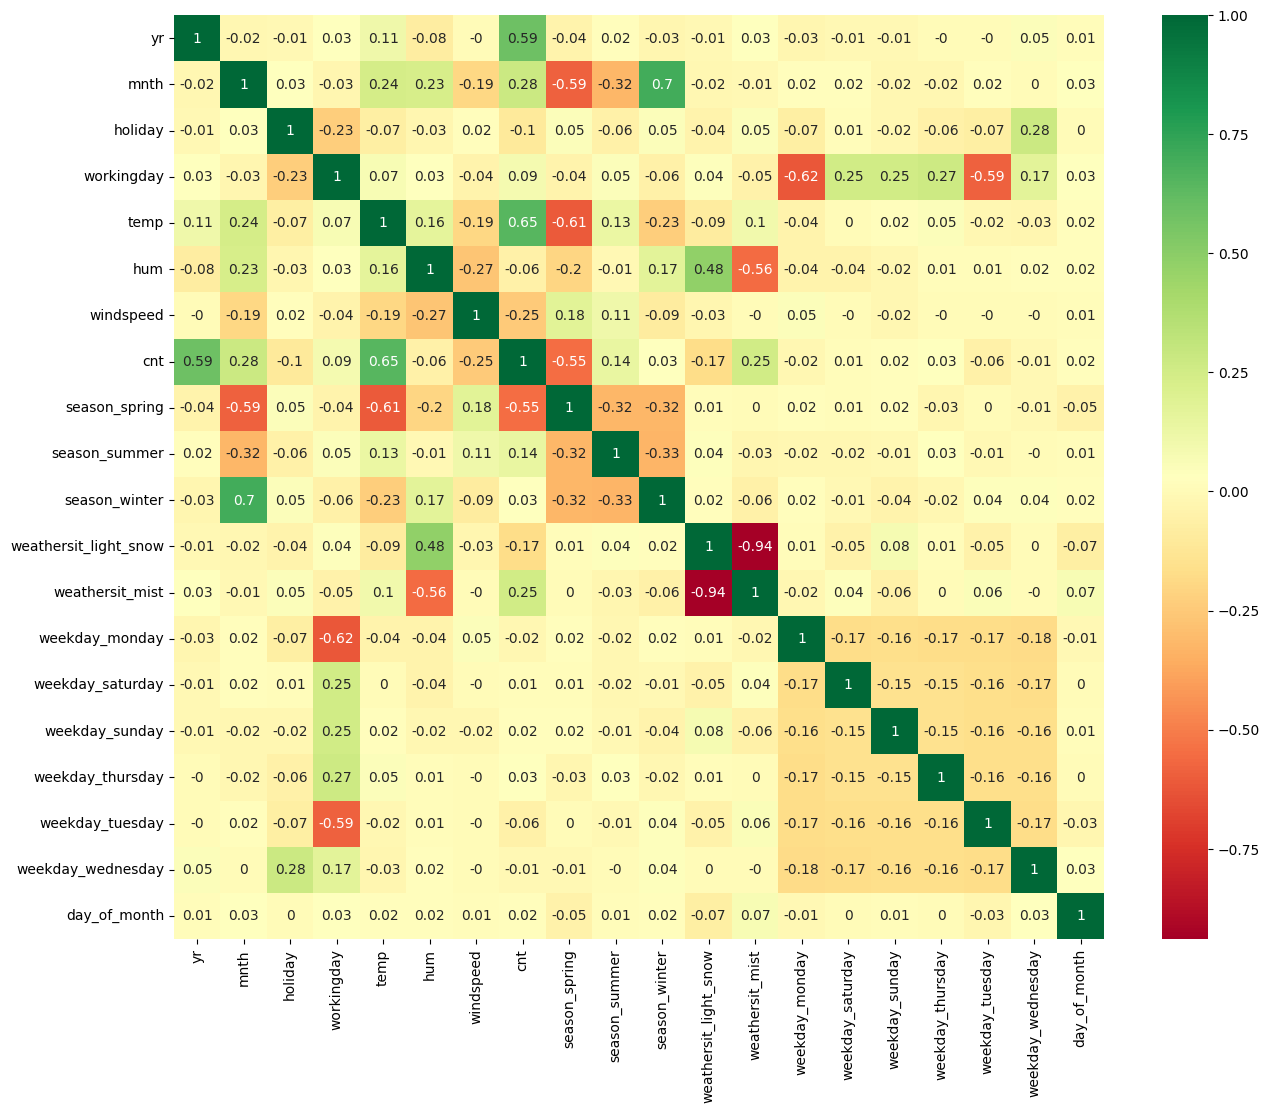

In [44]:
# plot heatmap to see how the target variable cnt is correlated with the independent variables
plot_heatmap(df_train)

In [45]:
# Indpendent variables
X_train = df_train.drop(['cnt'], axis='columns')

# Target / Dependent variable
y_train = df_train.cnt

In [46]:
import statsmodels.api as sm

In [47]:
# Helper function to create a linear regression model using statsmodels OLS
def fit_lr_model(x_train, y_train):
    x_train_sm = sm.add_constant(x_train) # Add intercept
    lr_obj = sm.OLS(y_train, x_train_sm)
    return lr_obj.fit()

### Feature Elimination

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
# Helper method for calculating variance inflation factor of all the predictors / variables in the given dataframe
def calculate_vif(train_df):
    vif_df = pd.DataFrame({"Variables": train_df.columns})
    vif_df['VIF'] = [variance_inflation_factor(train_df.values, i) for i in range(train_df.shape[1])]
    return vif_df.sort_values(by=['VIF'], ascending=False)

In [50]:
calculate_vif(X_train)

,Variables,VIF
3,workingday,102.108037
12,weekday_monday,23.277331
16,weekday_tuesday,22.383027
11,weathersit_mist,10.359559
10,weathersit_light_snow,8.979128
7,season_spring,5.747452
2,holiday,5.114051
1,mnth,3.904626
9,season_winter,3.727279
4,temp,3.525781


In [51]:
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     137.0
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          3.42e-178
Time:                        20:54:36   Log-Likelihood:                 496.71
No. Observations:                 510   AIC:                            -955.4
Df Residuals:                     491   BIC:                            -875.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0087      0.041      0.215      0.830      -0.071       0.089
yr                        0.2320      0.008     27.585      0.000       0.215       0.249
mnth                      0.0152      0.026      0.586      0.558      -0.036       0.066
holiday                  -0.0487      0.025     -1.926      0.055      -0.098       0.001
workingday                0.0365      0.013      2.788      0.006       0.011       0.062
temp                      0.4914      0.034     14.322      0.000       0.424       0.559
hum                      -0.1264      0.039     -3.233      0.001      -0.203      -0.050
windspeed                -0.1801      0.027     -6.766      0.000      -0.232      -0.128
season_spring            -0.0693      0.023     -3.009      0.003      -0.115      -0.024
season_summer             0.0477      0.015      3.084      0.002       0.017       0.078
season_winter             0.0842      0.018      4.560      0.000       0.048       0.120
weathersit_light_snow     0.1921      0.026      7.391      0.000       0.141       0.243
weathersit_mist           0.2496      0.027      9.102      0.000       0.196       0.303
weekday_monday            0.0386      0.015      2.653      0.008       0.010       0.067
weekday_saturday         -0.0053      0.015     -0.341      0.733      -0.035       0.025
weekday_sunday            0.0029      0.016      0.186      0.853      -0.028       0.034
weekday_thursday         -0.0154      0.015     -0.997      0.319      -0.046       0.015
weekday_tuesday          -0.0177      0.015     -1.148      0.251      -0.048       0.013
weekday_wednesday        -0.0185      0.015     -1.208      0.228      -0.049       0.012
day_of_month             -0.0096      0.014     -0.682      0.496      -0.037       0.018
==============================================================================
Omnibus:                       69.520   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.478
Skew:                          -0.697   Prob(JB):                     1.30e-38
Kurtosis:                       5.504   Cond. No.                     3.86e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.33e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Some of the predictors have very high variance inflation factor and hence they need to be dropped one by one

#### Drop `mnth` since it has high p value, low VIF (p = 0.56, VIF = 3.90)

In [52]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns = ['mnth']

# Drop the mnth column as it has very high VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping mnth
calculate_vif(X_train)

,Variables,VIF
2,workingday,97.290332
11,weekday_monday,22.108657
15,weekday_tuesday,21.391335
10,weathersit_mist,10.323120
9,weathersit_light_snow,8.964788
1,holiday,4.889398
6,season_spring,4.567314
3,temp,3.519526
8,season_winter,3.104483
7,season_summer,2.073655


In [53]:
# Look at the model summary with mnth dropped 
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     145.2
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          3.31e-179
Time:                        20:54:36   Log-Likelihood:                 496.53
No. Observations:                 510   AIC:                            -957.1
Df Residuals:                     492   BIC:                            -880.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0141      0.040      0.355      0.723      -0.064       0.092
yr                        0.2318      0.008     27.601      0.000       0.215       0.248
holiday                  -0.0469      0.025     -1.868      0.062      -0.096       0.002
workingday                0.0376      0.013      2.907      0.004       0.012       0.063
temp                      0.4923      0.034     14.369      0.000       0.425       0.560
hum                      -0.1243      0.039     -3.194      0.001      -0.201      -0.048
windspeed                -0.1797      0.027     -6.758      0.000      -0.232      -0.127
season_spring            -0.0755      0.021     -3.676      0.000      -0.116      -0.035
season_summer             0.0435      0.014      3.165      0.002       0.017       0.071
season_winter             0.0886      0.017      5.263      0.000       0.056       0.122
weathersit_light_snow     0.1927      0.026      7.426      0.000       0.142       0.244
weathersit_mist           0.2505      0.027      9.159      0.000       0.197       0.304
weekday_monday            0.0399      0.014      2.778      0.006       0.012       0.068
weekday_saturday         -0.0050      0.015     -0.325      0.745      -0.035       0.025
weekday_sunday            0.0029      0.016      0.187      0.852      -0.028       0.034
weekday_thursday         -0.0157      0.015     -1.018      0.309      -0.046       0.015
weekday_tuesday          -0.0166      0.015     -1.089      0.277      -0.047       0.013
weekday_wednesday        -0.0188      0.015     -1.228      0.220      -0.049       0.011
day_of_month             -0.0097      0.014     -0.695      0.487      -0.037       0.018
==============================================================================
Omnibus:                       69.743   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.590
Skew:                          -0.698   Prob(JB):                     7.43e-39
Kurtosis:                       5.513   Cond. No.                     1.59e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.36e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Drop `weekday_sunday` since it has high p value and low VIF (p = 0.85, VIF = 1.60)

In [54]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns.append('weekday_sunday')

# Drop the weekday_sunday column as it has high VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping weekday_sunday
calculate_vif(X_train)

,Variables,VIF
2,workingday,95.561203
11,weekday_monday,22.107378
14,weekday_tuesday,21.390453
10,weathersit_mist,10.278423
9,weathersit_light_snow,8.880620
1,holiday,4.810123
6,season_spring,4.565232
3,temp,3.519205
8,season_winter,3.103012
7,season_summer,2.069532


In [55]:
# Look at the model summary again now that a column has been dropped
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     154.6
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.67e-180
Time:                        20:54:36   Log-Likelihood:                 496.51
No. Observations:                 510   AIC:                            -959.0
Df Residuals:                     493   BIC:                            -887.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0145      0.040      0.368      0.713      -0.063       0.092
yr                        0.2318      0.008     27.629      0.000       0.215       0.248
holiday                  -0.0460      0.025     -1.868      0.062      -0.094       0.002
workingday                0.0383      0.012      3.116      0.002       0.014       0.063
temp                      0.4922      0.034     14.382      0.000       0.425       0.559
hum                      -0.1246      0.039     -3.209      0.001      -0.201      -0.048
windspeed                -0.1797      0.027     -6.765      0.000      -0.232      -0.127
season_spring            -0.0755      0.021     -3.684      0.000      -0.116      -0.035
season_summer             0.0434      0.014      3.163      0.002       0.016       0.070
season_winter             0.0885      0.017      5.265      0.000       0.055       0.122
weathersit_light_snow     0.1932      0.026      7.486      0.000       0.142       0.244
weathersit_mist           0.2509      0.027      9.200      0.000       0.197       0.304
weekday_monday            0.0394      0.014      2.804      0.005       0.012       0.067
weekday_saturday         -0.0063      0.014     -0.459      0.647      -0.033       0.021
weekday_thursday         -0.0170      0.014     -1.237      0.217      -0.044       0.010
weekday_tuesday          -0.0172      0.015     -1.148      0.252      -0.047       0.012
weekday_wednesday        -0.0201      0.014     -1.480      0.140      -0.047       0.007
day_of_month             -0.0097      0.014     -0.693      0.489      -0.037       0.018
==============================================================================
Omnibus:                       69.444   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.799
Skew:                          -0.695   Prob(JB):                     1.10e-38
Kurtosis:                       5.509   Cond. No.                     1.58e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.44e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Drop `weekday_saturday` since it has high p value and low VIF (p = 0.65, VIF = 1.28)

In [56]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns.append('weekday_saturday')

# Drop the weekday_saturday column as it has very high VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping weekday_saturday
calculate_vif(X_train)

,Variables,VIF
2,workingday,94.285658
11,weekday_monday,22.092180
13,weekday_tuesday,21.376794
10,weathersit_mist,10.277721
9,weathersit_light_snow,8.872284
1,holiday,4.741368
6,season_spring,4.562410
3,temp,3.516858
8,season_winter,3.102386
7,season_summer,2.067740


In [57]:
# Look at the model summary again now that a column has been dropped 
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.1
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.26e-181
Time:                        20:54:36   Log-Likelihood:                 496.40
No. Observations:                 510   AIC:                            -960.8
Df Residuals:                     494   BIC:                            -893.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0132      0.039      0.335      0.738      -0.064       0.091
yr                        0.2318      0.008     27.649      0.000       0.215       0.248
holiday                  -0.0477      0.024     -1.963      0.050      -0.096     5.5e-05
workingday                0.0371      0.012      3.093      0.002       0.014       0.061
temp                      0.4926      0.034     14.410      0.000       0.425       0.560
hum                      -0.1245      0.039     -3.209      0.001      -0.201      -0.048
windspeed                -0.1798      0.027     -6.773      0.000      -0.232      -0.128
season_spring            -0.0753      0.020     -3.677      0.000      -0.116      -0.035
season_summer             0.0436      0.014      3.181      0.002       0.017       0.071
season_winter             0.0886      0.017      5.276      0.000       0.056       0.122
weathersit_light_snow     0.1935      0.026      7.510      0.000       0.143       0.244
weathersit_mist           0.2510      0.027      9.211      0.000       0.197       0.304
weekday_monday            0.0402      0.014      2.883      0.004       0.013       0.068
weekday_thursday         -0.0150      0.013     -1.152      0.250      -0.041       0.011
weekday_tuesday          -0.0164      0.015     -1.103      0.270      -0.046       0.013
weekday_wednesday        -0.0180      0.013     -1.408      0.160      -0.043       0.007
day_of_month             -0.0096      0.014     -0.691      0.490      -0.037       0.018
==============================================================================
Omnibus:                       69.675   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.638
Skew:                          -0.697   Prob(JB):                     7.26e-39
Kurtosis:                       5.515   Cond. No.                     1.57e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.44e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Drop `day_of_month` since it has high p value and low VIF (p = 0.49, VIF = 1.02)

In [58]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns.append('day_of_month')

# Drop the day_of_month column as it has very high VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping day_of_month
calculate_vif(X_train)

,Variables,VIF
2,workingday,93.041959
11,weekday_monday,21.824269
13,weekday_tuesday,21.153727
10,weathersit_mist,10.269199
9,weathersit_light_snow,8.871024
1,holiday,4.699029
6,season_spring,4.549845
3,temp,3.511816
8,season_winter,3.100456
7,season_summer,2.066415


In [59]:
# Look at the model summary again now that a column has been dropped
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.12e-182
Time:                        20:54:37   Log-Likelihood:                 496.16
No. Observations:                 510   AIC:                            -962.3
Df Residuals:                     495   BIC:                            -898.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0102      0.039      0.261      0.794      -0.067       0.087
yr                        0.2317      0.008     27.657      0.000       0.215       0.248
holiday                  -0.0484      0.024     -1.994      0.047      -0.096      -0.001
workingday                0.0362      0.012      3.037      0.003       0.013       0.060
temp                      0.4935      0.034     14.455      0.000       0.426       0.561
hum                      -0.1263      0.039     -3.263      0.001      -0.202      -0.050
windspeed                -0.1805      0.027     -6.809      0.000      -0.233      -0.128
season_spring            -0.0746      0.020     -3.648      0.000      -0.115      -0.034
season_summer             0.0439      0.014      3.201      0.001       0.017       0.071
season_winter             0.0889      0.017      5.298      0.000       0.056       0.122
weathersit_light_snow     0.1938      0.026      7.522      0.000       0.143       0.244
weathersit_mist           0.2504      0.027      9.200      0.000       0.197       0.304
weekday_monday            0.0394      0.014      2.838      0.005       0.012       0.067
weekday_thursday         -0.0150      0.013     -1.148      0.251      -0.041       0.011
weekday_tuesday          -0.0170      0.015     -1.145      0.253      -0.046       0.012
weekday_wednesday        -0.0182      0.013     -1.420      0.156      -0.043       0.007
==============================================================================
Omnibus:                       71.934   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.914
Skew:                          -0.717   Prob(JB):                     3.15e-40
Kurtosis:                       5.550   Cond. No.                     1.52e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.47e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Drop `weekday_tuesday` since it has high p value and high VIF (p = 0.25, VIF = 21.15)

In [60]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns.append('weekday_tuesday')

# Drop the weekday_tuesday column as it has high VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping weekday_tuesday
calculate_vif(X_train)

,Variables,VIF
4,hum,24.189652
3,temp,20.499469
10,weathersit_mist,14.351117
9,weathersit_light_snow,8.895438
2,workingday,5.989254
6,season_spring,5.092404
5,windspeed,4.656087
8,season_winter,3.639275
7,season_summer,2.557929
0,yr,2.097965


In [61]:
# Look at the model summary again now that a column has been dropped
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.12e-182
Time:                        20:54:37   Log-Likelihood:                 496.16
No. Observations:                 510   AIC:                            -962.3
Df Residuals:                     495   BIC:                            -898.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0068      0.050     -0.135      0.893      -0.105       0.091
yr                        0.2317      0.008     27.657      0.000       0.215       0.248
holiday                  -0.0315      0.030     -1.059      0.290      -0.090       0.027
workingday                0.0532      0.013      4.196      0.000       0.028       0.078
temp                      0.4935      0.034     14.455      0.000       0.426       0.561
hum                      -0.1263      0.039     -3.263      0.001      -0.202      -0.050
windspeed                -0.1805      0.027     -6.809      0.000      -0.233      -0.128
season_spring            -0.0746      0.020     -3.648      0.000      -0.115      -0.034
season_summer             0.0439      0.014      3.201      0.001       0.017       0.071
season_winter             0.0889      0.017      5.298      0.000       0.056       0.122
weathersit_light_snow     0.1938      0.026      7.522      0.000       0.143       0.244
weathersit_mist           0.2504      0.027      9.200      0.000       0.197       0.304
weekday_monday            0.0564      0.015      3.719      0.000       0.027       0.086
weekday_thursday         -0.0150      0.013     -1.148      0.251      -0.041       0.011
weekday_wednesday        -0.0182      0.013     -1.420      0.156      -0.043       0.007
==============================================================================
Omnibus:                       71.934   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.914
Skew:                          -0.717   Prob(JB):                     3.15e-40
Kurtosis:                       5.550   Cond. No.                         28.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Drop `weekday_thursday` since it has high p value and low VIF (p = 0.25, VIF = 1.32)

In [62]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns.append('weekday_thursday')

# Drop the weekday_thursday column as it has low signifance (high p-value) and low VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping weekday_thursday
calculate_vif(X_train)

,Variables,VIF
4,hum,24.187747
3,temp,20.499245
10,weathersit_mist,14.344535
9,weathersit_light_snow,8.891759
2,workingday,5.630825
6,season_spring,5.090829
5,windspeed,4.656053
8,season_winter,3.639252
7,season_summer,2.557816
0,yr,2.097945


In [63]:
# Look at the model summary again now that a column has been dropped
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.5
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.89e-183
Time:                        20:54:37   Log-Likelihood:                 495.48
No. Observations:                 510   AIC:                            -963.0
Df Residuals:                     496   BIC:                            -903.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0038      0.050     -0.077      0.939      -0.102       0.094
yr                        0.2317      0.008     27.648      0.000       0.215       0.248
holiday                  -0.0342      0.030     -1.154      0.249      -0.092       0.024
workingday                0.0496      0.012      4.036      0.000       0.025       0.074
temp                      0.4929      0.034     14.434      0.000       0.426       0.560
hum                      -0.1274      0.039     -3.292      0.001      -0.203      -0.051
windspeed                -0.1812      0.027     -6.834      0.000      -0.233      -0.129
season_spring            -0.0746      0.020     -3.651      0.000      -0.115      -0.034
season_summer             0.0435      0.014      3.178      0.002       0.017       0.070
season_winter             0.0886      0.017      5.280      0.000       0.056       0.122
weathersit_light_snow     0.1924      0.026      7.475      0.000       0.142       0.243
weathersit_mist           0.2488      0.027      9.151      0.000       0.195       0.302
weekday_monday            0.0563      0.015      3.713      0.000       0.026       0.086
weekday_wednesday        -0.0147      0.012     -1.181      0.238      -0.039       0.010
==============================================================================
Omnibus:                       71.699   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.168
Skew:                          -0.710   Prob(JB):                     1.02e-40
Kurtosis:                       5.579   Cond. No.                         28.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Drop `weekday_wednesday` since it has high p value and low VIF (p = 0.24, VIF = 1.38)

In [64]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns.append('weekday_wednesday')

# Drop the weekday_wednesday column as it has low significance (high p-value), low VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping weekday_wednesday
calculate_vif(X_train)

,Variables,VIF
4,hum,24.153772
3,temp,20.434592
10,weathersit_mist,14.341990
9,weathersit_light_snow,8.891606
2,workingday,5.400092
6,season_spring,5.082558
5,windspeed,4.655982
8,season_winter,3.638845
7,season_summer,2.557678
0,yr,2.089809


In [65]:
# Look at the model summary again now that a column has been dropped
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.1
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          3.95e-184
Time:                        20:54:37   Log-Likelihood:                 494.76
No. Observations:                 510   AIC:                            -963.5
Df Residuals:                     497   BIC:                            -908.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0028      0.050     -0.056      0.956      -0.101       0.095
yr                        0.2311      0.008     27.618      0.000       0.215       0.248
holiday                  -0.0455      0.028     -1.621      0.106      -0.101       0.010
workingday                0.0467      0.012      3.876      0.000       0.023       0.070
temp                      0.4948      0.034     14.499      0.000       0.428       0.562
hum                      -0.1292      0.039     -3.341      0.001      -0.205      -0.053
windspeed                -0.1815      0.027     -6.844      0.000      -0.234      -0.129
season_spring            -0.0739      0.020     -3.615      0.000      -0.114      -0.034
season_summer             0.0436      0.014      3.179      0.002       0.017       0.071
season_winter             0.0887      0.017      5.282      0.000       0.056       0.122
weathersit_light_snow     0.1920      0.026      7.456      0.000       0.141       0.243
weathersit_mist           0.2481      0.027      9.123      0.000       0.195       0.302
weekday_monday            0.0562      0.015      3.706      0.000       0.026       0.086
==============================================================================
Omnibus:                       70.425   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.155
Skew:                          -0.699   Prob(JB):                     7.58e-40
Kurtosis:                       5.554   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Drop `holiday` since it has high p value and low VIF (p = 0.11, VIF = 1.18)

In [66]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns.append('holiday')

# Drop the holiday column as it has low signifiance (high p-value) and low VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping holiday
calculate_vif(X_train)

,Variables,VIF
3,hum,24.086232
2,temp,20.426846
9,weathersit_mist,14.194423
8,weathersit_light_snow,8.842014
5,season_spring,5.069495
1,workingday,4.790604
4,windspeed,4.645938
7,season_winter,3.629533
6,season_summer,2.557677
0,yr,2.089756


In [67]:
# Look at the model summary again now that a column has been dropped
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     223.8
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          9.49e-185
Time:                        20:54:37   Log-Likelihood:                 493.42
No. Observations:                 510   AIC:                            -962.8
Df Residuals:                     498   BIC:                            -912.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0096      0.050     -0.193      0.847      -0.108       0.088
yr                        0.2312      0.008     27.592      0.000       0.215       0.248
workingday                0.0534      0.011      4.718      0.000       0.031       0.076
temp                      0.4955      0.034     14.495      0.000       0.428       0.563
hum                      -0.1285      0.039     -3.318      0.001      -0.205      -0.052
windspeed                -0.1819      0.027     -6.850      0.000      -0.234      -0.130
season_spring            -0.0744      0.020     -3.631      0.000      -0.115      -0.034
season_summer             0.0441      0.014      3.211      0.001       0.017       0.071
season_winter             0.0882      0.017      5.244      0.000       0.055       0.121
weathersit_light_snow     0.1915      0.026      7.427      0.000       0.141       0.242
weathersit_mist           0.2475      0.027      9.085      0.000       0.194       0.301
weekday_monday            0.0630      0.015      4.321      0.000       0.034       0.092
==============================================================================
Omnibus:                       74.702   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.124
Skew:                          -0.726   Prob(JB):                     5.77e-44
Kurtosis:                       5.694   Cond. No.                         28.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Drop `hum` since it has low p value and high VIF (p = 0.001, VIF = 24.09)

In [68]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns.append('hum')

# Drop the hum column as it has low significance (high p-value), high VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping hum
calculate_vif(X_train)

,Variables,VIF
8,weathersit_mist,14.142313
2,temp,12.361349
7,weathersit_light_snow,8.036848
1,workingday,4.710492
3,windspeed,4.622385
4,season_spring,3.874197
6,season_winter,2.462746
5,season_summer,2.256226
0,yr,2.073623
9,weekday_monday,1.841823


In [69]:
# Look at the model summary with hum dropped 
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     240.3
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          1.35e-183
Time:                        20:54:37   Log-Likelihood:                 487.84
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     499   BIC:                            -907.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1124      0.039     -2.852      0.005      -0.190      -0.035
yr                        0.2343      0.008     27.864      0.000       0.218       0.251
workingday                0.0555      0.011      4.864      0.000       0.033       0.078
temp                      0.4683      0.034     13.972      0.000       0.402       0.534
windspeed                -0.1561      0.026     -6.086      0.000      -0.206      -0.106
season_spring            -0.0814      0.021     -3.959      0.000      -0.122      -0.041
season_summer             0.0396      0.014      2.870      0.004       0.012       0.067
season_winter             0.0769      0.017      4.621      0.000       0.044       0.110
weathersit_light_snow     0.2064      0.026      8.050      0.000       0.156       0.257
weathersit_mist           0.2833      0.025     11.221      0.000       0.234       0.333
weekday_monday            0.0666      0.015      4.532      0.000       0.038       0.095
==============================================================================
Omnibus:                       72.947   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.645
Skew:                          -0.716   Prob(JB):                     4.00e-42
Kurtosis:                       5.631   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Drop `weathersit_mist` since it has low p value and high VIF (p = 0.00, VIF = 14.14)

In [70]:
# Store the dropped columns in a list so that it's easier to drop from the test dataframe 
dropped_columns.append('weathersit_mist')

# Drop the weathersit_mist column as it has high VIF
X_train = X_train.drop(dropped_columns[-1], axis='columns')

# Calculate VIF for remaining predictors after dropping weathersit_mist
calculate_vif(X_train)

,Variables,VIF
2,temp,5.267177
1,workingday,4.616194
3,windspeed,4.579702
4,season_spring,2.243291
0,yr,2.062306
5,season_summer,1.876573
8,weekday_monday,1.819379
6,season_winter,1.722006
7,weathersit_light_snow,1.525262


In [71]:
# Look at the model summary with weathersit_mist dropped 
sm_lr_model = fit_lr_model(X_train, y_train)
sm_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     202.4
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          1.79e-160
Time:                        20:54:37   Log-Likelihood:                 430.47
No. Observations:                 510   AIC:                            -840.9
Df Residuals:                     500   BIC:                            -798.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1624      0.035      4.700      0.000       0.094       0.230
yr                        0.2398      0.009     25.545      0.000       0.221       0.258
workingday                0.0475      0.013      3.729      0.000       0.022       0.073
temp                      0.4808      0.037     12.836      0.000       0.407       0.554
windspeed                -0.1845      0.029     -6.468      0.000      -0.241      -0.128
season_spring            -0.0712      0.023     -3.099      0.002      -0.116      -0.026
season_summer             0.0454      0.015      2.947      0.003       0.015       0.076
season_winter             0.0692      0.019      3.723      0.000       0.033       0.106
weathersit_light_snow    -0.0637      0.010     -6.443      0.000      -0.083      -0.044
weekday_monday            0.0584      0.016      3.561      0.000       0.026       0.091
==============================================================================
Omnibus:                      127.519   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.253
Skew:                          -1.133   Prob(JB):                     1.37e-94
Kurtosis:                       6.900   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

These 10 columns have been dropped recursively in the following order

1. High p-value, high VIF
2. High p-value, low VIF,
3. Low p-value, high VIF

In [72]:
print('Dropped columns: ', dropped_columns)

Dropped columns:  ['mnth', 'weekday_sunday', 'weekday_saturday', 'day_of_month', 'weekday_tuesday', 'weekday_thursday', 'weekday_wednesday', 'holiday', 'hum', 'weathersit_mist']


# Residual Analysis

In [73]:
# Compute the predicted values for the training set
X_train_sm = sm.add_constant(X_train)
y_train_pred = sm_lr_model.predict(X_train_sm)
residuals = y_train - y_train_pred

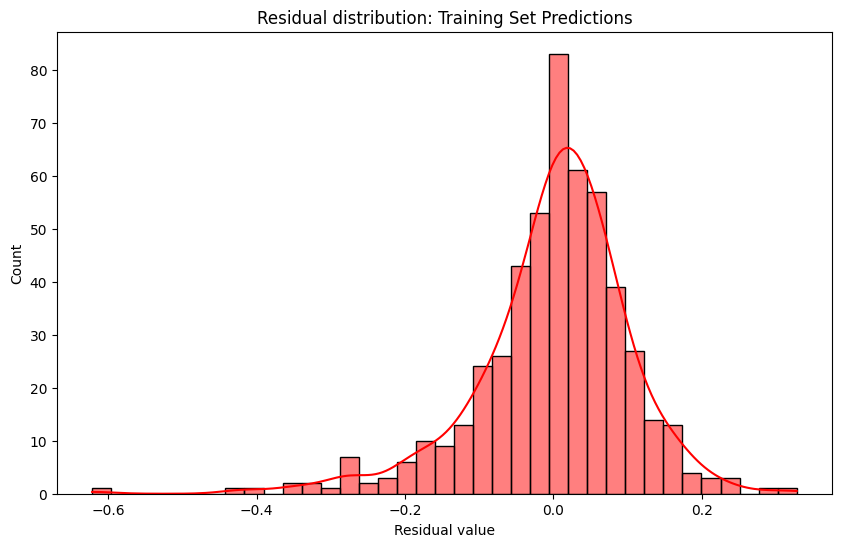

In [74]:
plt.figure(figsize=(10, 6))
plt.title('Residual distribution: Training Set Predictions')
sns.histplot(data=residuals, kde=True, color='red')
plt.xlabel('Residual value')
plt.show()

> From the residual distribution above, it can be noted that it's more or less __normally distributed__ with most of the residual terms peaking at 0.

## Test Set Predictions

#### Transform test set

The test set has been scaled but is missing some other transformations that were made on the training set (Dropped columns, etc.)

In [75]:
X_train

,yr,workingday,temp,windspeed,season_spring,season_summer,season_winter,weathersit_light_snow,weekday_monday
576,1,1,0.815169,0.264686,0,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,1,1
728,1,0,0.245101,0.663106,1,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,1,1
111,0,1,0.345824,0.380981,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
578,1,1,0.863973,0.187140,0,0,0,0,0
53,0,1,0.202618,0.111379,1,0,0,0,0
350,0,0,0.248216,0.431816,0,0,1,1,1
79,0,1,0.462664,0.529881,0,1,0,1,0


In [76]:
df_test

,yr,mnth,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light_snow,weathersit_mist,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,day_of_month
184,0,0.545455,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,1,0,0,0,0,0,0,1,0.100000
535,1,0.454545,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,0,1,0,0,0,0,0,0,0.633333
299,0,0.818182,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,1,0,0,1,0,0,0,0,0.866667
221,0,0.636364,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,0,1,0,0,0,0,0,0,0.300000
152,0,0.454545,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,0,1,0,1,0,0,0,0,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,1.000000,0,1,0.519232,0.756118,0.283397,0.757478,0,0,1,0,1,0,0,0,1,0,0,0.100000
127,0,0.363636,0,0,0.584649,0.650923,0.069510,0.495973,0,1,0,0,1,0,0,0,0,1,0,0.233333
640,1,0.818182,0,1,0.745598,0.817947,0.052115,0.868615,0,0,1,1,0,0,0,0,0,0,0,0.066667
72,0,0.181818,0,1,0.331557,0.512107,0.203418,0.232858,1,0,0,0,1,0,0,0,0,0,1,0.433333


In [77]:
X_test = df_test[X_train.columns]
X_test_sm = sm.add_constant(X_test)

y_test = df_test['cnt']
y_test_pred = sm_lr_model.predict(X_test_sm)
redisuals_test = y_test - y_test_pred

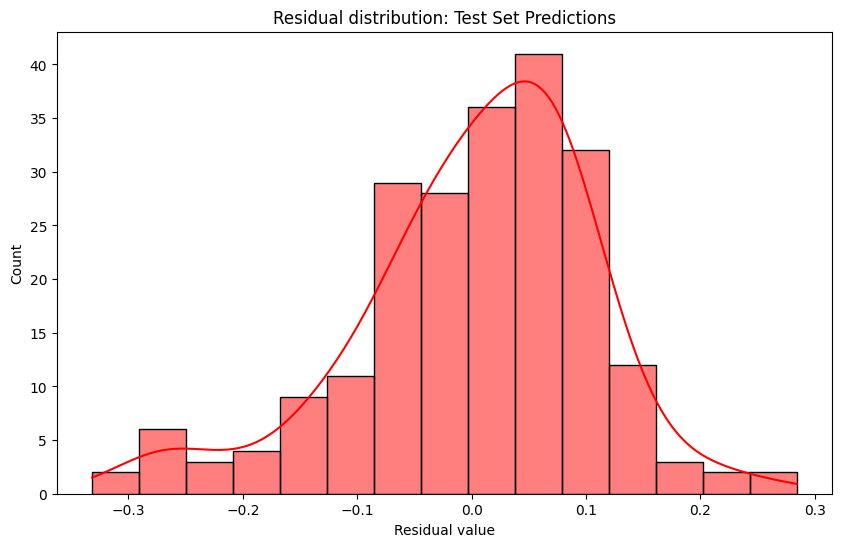

In [78]:
plt.figure(figsize=(10, 6))
plt.title('Residual distribution: Test Set Predictions')
sns.histplot(data=redisuals_test, kde=True, color='red')
plt.xlabel('Residual value')
plt.show()

## $R^{2}$ Analysis

In [79]:
from sklearn.metrics import r2_score

In [80]:
# Evaluate R2
r2_train_set = r2_score(y_true=y_train, y_pred=y_train_pred)
r2_test_set = r2_score(y_true=y_test, y_pred=y_test_pred)

print('R^2 for training set = ', round(r2_train_set, 2))
print('R^2 for test set     = ', round(r2_test_set, 2))

R^2 for training set =  0.78
R^2 for test set     =  0.77


As calculated above, the $R^2$ values are pretty close for both the training and test sets which indicates that the model is able to generalize what is has learned on the test set. 

---

# Conclusion

### Model Interpretation

<div class="alert alert-info">

Looking at the coefficients below, it can be stated that 

1. `temp` has a strong positive correlation with `cnt`.
2. Followed by `yr`. This makes sense because as time goes by, bike sharing also increases in usage
3. Windspeed is negatively associated, which makes sense logically since higher windspeeds might discourage bike usage in general.
4. Snowy conditions are negatively associated, which also makes sense logically as bike accidents are more likley to in snowy conditions.
</div>

In [81]:
sm_lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     202.4
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          1.79e-160
Time:                        20:54:37   Log-Likelihood:                 430.47
No. Observations:                 510   AIC:                            -840.9
Df Residuals:                     500   BIC:                            -798.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1624      0.035      4.700      0.000       0.094       0.230
yr                        0.2398      0.009     25.545      0.000       0.221       0.258
workingday                0.0475      0.013      3.729      0.000       0.022       0.073
temp                      0.4808      0.037     12.836      0.000       0.407       0.554
windspeed                -0.1845      0.029     -6.468      0.000      -0.241      -0.128
season_spring            -0.0712      0.023     -3.099      0.002      -0.116      -0.026
season_summer             0.0454      0.015      2.947      0.003       0.015       0.076
season_winter             0.0692      0.019      3.723      0.000       0.033       0.106
weathersit_light_snow    -0.0637      0.010     -6.443      0.000      -0.083      -0.044
weekday_monday            0.0584      0.016      3.561      0.000       0.026       0.091
==============================================================================
Omnibus:                      127.519   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.253
Skew:                          -1.133   Prob(JB):                     1.37e-94
Kurtosis:                       6.900   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---